# Homework 3
### Name: [Yang An]
### Collaborators: [None]

Due date: May 19, 2024

Submission instructions: 
- __Autograder will not be used for scoring, but you still need to submit the python file converted from this notebook (.py) and the notebook file (.ipynb) to the code submission window.__ 
To convert a Jupyter Notebook (`.ipynb`) to a regular Python script (`.py`):
  - In Jupyter Notebook: File > Download as > Python (.py)
  - In JupyterLab: File > Save and Export Notebook As... > Executable Script
  - In VS Code Jupyter Notebook App: In the toolbar, there is an Export menu. Click on it, and select Python script.
- Submit `hw3.ipynb` and `hw3.py` on Gradescope under the window "Homework 3 - code". Do **NOT** change the file name.
- Convert this notebook into a pdf file and submit it on Gradescope under the window "Homework 3 - PDF". Make sure all your code and text outputs in the problems are visible. 


This homework requires two new packages, `pyarrow` and `duckdb`. Pleas make sure to install them in your `BIOSTAT203C-24S` environment:

```bash
conda activate BIOSTAT203C-24S
conda install -c conda-forge pyarrow python-duckdb
```


## Problem 1. 

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "foward" one unit; if tails, we move "backward." 

### (A).

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 




In [1]:
import random

def rw(n):
    """
    Simulates a simple random walk.

    Parameters:
        n (int): The number of steps for the random walk.

    Returns:
        list: A list of positions of the walker after each step.
    """
    position = 0
    positions = [position]
    for _ in range(n):
        step = random.choice([-1, 1])
        position += step
        positions.append(position)
    return positions

# Example usage:
print(rw(10))


[0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 2]


### (B). 

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- `np.cumsum()`. 


In [2]:
import numpy as np

rw2 = lambda n: np.cumsum(np.random.choice([-1, 1], n))

# Example usage:
print(rw2(10))


[-1  0 -1 -2 -3 -2 -3 -2 -1 -2]


### (C).

Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [3]:
%timeit rw(10000)
%timeit rw2(10000)


1.78 ms ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
54.6 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### (D). 

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 

Performance:
rw(), which is implemented with pure Python loops and list operations, is significantly slower than rw2(). This is because Python's loop constructs and dynamic type checking add overhead.
rw2() uses NumPy, which is highly optimized for array operations and executes in compiled code. The use of np.random.choice() to generate steps and np.cumsum() to accumulate them is not only concise but also computationally efficient due to NumPy's underlying C-based implementation.

Ease of Writing and Reading:
rw() is straightforward and easy to understand for anyone familiar with basic Python programming. However, managing manual loops and step accumulations makes it prone to errors and a bit cumbersome for large-scale data operations.
rw2() is extremely concise, leveraging NumPy's powerful array operations. It reduces the function to a one-liner, which is elegant but may require a bit more understanding of how NumPy functions operate. It's generally easier to maintain and less prone to bugs due to fewer lines of code.


### (E). 


In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 





In [4]:
rw_d = lambda n, d: np.cumsum(np.random.choice([-1, 1], (n, d)), axis=0)

# Example usage:
print(rw_d(5, 3))


[[-1 -1 -1]
 [-2 -2 -2]
 [-3 -1 -1]
 [-4 -2 -2]
 [-5 -1 -1]]


### (F).

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 

In [5]:
def rw_d_vanilla(n, d):
    from random import choice
    # Initialize the starting position at the origin in d-dimensional space
    current_position = [0] * d
    path = [current_position[:]]  # Copy the current position to path
    
    for _ in range(n):
        # Generate random step in each dimension
        step = [choice([-1, 1]) for _ in range(d)]
        # Update current position in each dimension
        current_position = [current_position[i] + step[i] for i in range(d)]
        path.append(current_position[:])  # Append the new position to the path
    
    return path

# Output for a 3-dimensional random walk of 5 steps
rw_d_vanilla(5, 3)


[[0, 0, 0], [1, 1, 1], [2, 2, 0], [1, 3, 1], [2, 4, 2], [1, 5, 1]]

Performance Comparison:

The vanilla Python implementation (rw_d_vanilla) is slower than the NumPy-based approach (rw_d). The nested loops and list operations in Python are less efficient compared to NumPy's vectorized operations.
Memory usage and execution time would both be higher in the Python-only version, especially as n and d increase.
Which Approach to Recommend:

For computational efficiency, simplicity, and scalability, the NumPy approach is highly recommended. It is particularly well-suited for operations involving large datasets and requires high performance.
For educational purposes or environments where NumPy is not available, the vanilla Python approach serves well and helps in understanding the underlying mechanics of the random walk simulation. However, it's less practical for large-scale or performance-critical applications.


### (G).

Once you've implemented `rw_d()`, you can run the following code to generate a large random walk and visualize it. 

```python
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])
```

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

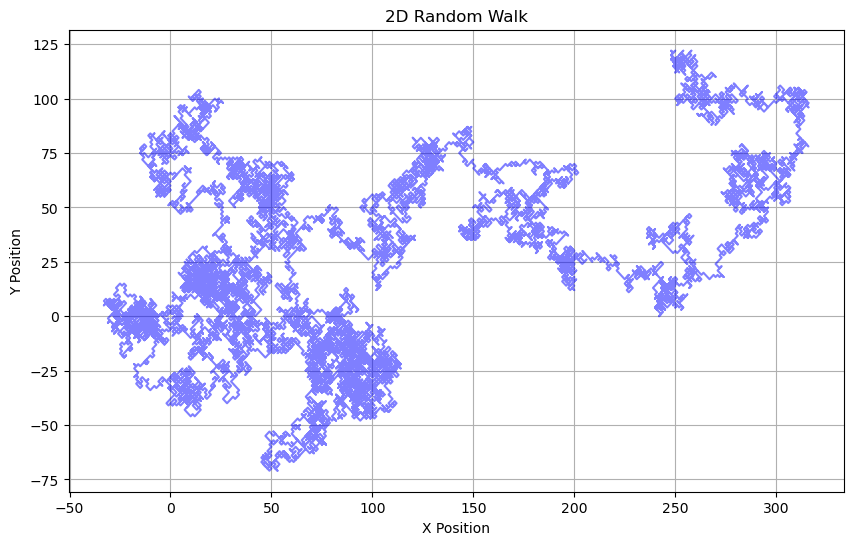

In [6]:
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.figure(figsize=(10, 6))
plt.plot(W[:, 0], W[:, 1], 'b-', alpha=0.5)
plt.title("2D Random Walk")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()


## Problem 2. Reading MIMIC-IV datafile
In this exercise, we explore various tools for ingesting the [MIMIC-IV](https://mimic.mit.edu/docs/iv/) data introduced in BIOSTAT 203B, but we will do it in Python this time.

Let's display the contents of MIMIC `hosp` and `icu` data folders: (if a cell starts with a `!`, the command is run in the shell.)

In [7]:
!ls -l ~/mimic/hosp/

total 8859760
-rw-rw-r--@ 1 yangan  staff    15516088 Jan  5  2023 admissions.csv.gz
-rw-rw-r--@ 1 yangan  staff      427468 Jan  5  2023 d_hcpcs.csv.gz
-rw-rw-r--@ 1 yangan  staff      859438 Jan  5  2023 d_icd_diagnoses.csv.gz
-rw-rw-r--@ 1 yangan  staff      578517 Jan  5  2023 d_icd_procedures.csv.gz
-rw-rw-r--@ 1 yangan  staff       12900 Jan  5  2023 d_labitems.csv.gz
-rw-rw-r--@ 1 yangan  staff    25070720 Jan  5  2023 diagnoses_icd.csv.gz
-rw-rw-r--@ 1 yangan  staff     7426955 Jan  5  2023 drgcodes.csv.gz
-rw-rw-r--@ 1 yangan  staff   508524623 Jan  5  2023 emar.csv.gz
-rw-rw-r--@ 1 yangan  staff   471096030 Jan  5  2023 emar_detail.csv.gz
-rw-rw-r--@ 1 yangan  staff     1767138 Jan  5  2023 hcpcsevents.csv.gz
-rw-rw-r--@ 1 yangan  staff  1939088924 Jan  5  2023 labevents.csv.gz
-rw-r--r--  1 yangan  staff          20 May  8 19:47 labevents_filtered.csv.gz
-rw-rw-r--@ 1 yangan  staff    96698496 Jan  5  2023 microbiologyevents.csv.gz
-rw-rw-r--@ 1 yangan  staff    36124944 Jan

In [8]:
!ls -l ~/mimic/icu/

total 6155968
-rw-rw-r--@ 1 yangan  staff       35893 Jan  5  2023 caregiver.csv.gz
-rw-rw-r--@ 1 yangan  staff  2467761053 Jan  5  2023 chartevents.csv.gz
-rw-rw-r--@ 1 yangan  staff       57476 Jan  5  2023 d_items.csv.gz
-rw-rw-r--@ 1 yangan  staff    45721062 Jan  5  2023 datetimeevents.csv.gz
-rw-rw-r--@ 1 yangan  staff     2614571 Jan  5  2023 icustays.csv.gz
-rw-rw-r--@ 1 yangan  staff   251962313 Jan  5  2023 ingredientevents.csv.gz
-rw-rw-r--@ 1 yangan  staff   324218488 Jan  5  2023 inputevents.csv.gz
-rw-rw-r--@ 1 yangan  staff    38747895 Jan  5  2023 outputevents.csv.gz
-rw-rw-r--@ 1 yangan  staff    20717852 Jan  5  2023 procedureevents.csv.gz


### (A). Speed, memory, and data types

Standard way to read a CSV file would be using the `read_csv` function of the `pandas` package. Let us check the speed of reading a moderate-sized compressed csv file, `admissions.csv.gz`. How much memory does the resulting data frame use?

_Note:_ If you start a cell with `%%time`, the runtime will be measured. 

In [9]:
%%time
import pandas as pd

# Load the data from a compressed CSV file
df = pd.read_csv('~/mimic/hosp/admissions.csv.gz')

# Display the DataFrame's memory usage
print(df.memory_usage(deep=True).sum())


368387448
CPU times: user 1.19 s, sys: 96.9 ms, total: 1.29 s
Wall time: 1.33 s


### (B). User-supplied data types

Re-ingest `admissions.csv.gz` by indicating appropriate column data types in [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Does the run time change? How much memory does the result dataframe use? (Hint: `dtype` and `parse_dates` arguments in `pd.read_csv`.)

In [10]:
%%time
import pandas as pd

# Define data types for the columns known
dtype_dict = {
    'subject_id': 'int32',
    # Add other columns with known types here
    # 'column_name': 'data_type'
}

# Load the data with specified data types
df = pd.read_csv('~/mimic/hosp/admissions.csv.gz', dtype=dtype_dict, parse_dates=['admittime'])

# Display the DataFrame's memory usage
print(df.memory_usage(deep=True).sum())


337338816
CPU times: user 1.1 s, sys: 74 ms, total: 1.18 s
Wall time: 1.18 s


## Problem 3. Ingest big data files


Let us focus on a bigger file, `labevents.csv.gz`, which is about 125x bigger than `admissions.csv.gz`.

In [11]:
!ls -l ~/mimic/hosp/labevents.csv.gz

-rw-rw-r--@ 1 yangan  staff  1939088924 Jan  5  2023 /Users/yangan/mimic/hosp/labevents.csv.gz


Display the first 10 lines of this file.

In [12]:
!zcat < ~/mimic/hosp/labevents.csv.gz | head -10

labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
1,10000032,,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.4,,0.9,1.1,abnormal,ROUTINE,
2,10000032,,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.1,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.
3,10000032,,52958335,50853,P28Z0X,2180-03-23 11:51:00,2180-03-25 11:06:00,___,15,ng/mL,30,60,abnormal,ROUTINE,NEW ASSAY IN USE ___: DETECTS D2 AND D3 25-OH ACCURATELY.
4,10000032,,52958335,50861,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,102,102,IU/L,0,40,abnormal,ROUTINE,
5,10000032,,52958335,50862,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,3.3,g/dL,3.5,5.2,abnormal,ROUTINE,
6,10000032,,52958335,50863,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,109,109,IU/L,35,105,abnormal,ROUTINE,
7,10000032,,52958335,50864,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,___,8,ng/mL,0,8.7,,ROUTI

### (A). Ingest `labevents.csv.gz` by `pd.read_csv`

Try to ingest `labevents.csv.gz` using `pd.read_csv`. What happens? If it takes more than 5 minutes on your computer, then abort the program and report your findings. 

In [13]:
import pandas as pd

try:
    df = pd.read_csv('~/mimic/hosp/labevents.csv.gz')
except Exception as e:
    print("Error:", e)


Yes, it takes more than 5 minutes and show "The kernel for Desktop/203C/hw3.ipynb appears to have died. It will restart automatically".

### (B). Ingest selected columns of `labevents.csv.gz` by `pd.read_csv`

Try to ingest only columns `subject_id`, `itemid`, `charttime`, and `valuenum` in `labevents.csv.gz` using `pd.read_csv`.  Does this solve the ingestion issue? (Hint: `usecols` argument in `pd.read_csv`.)

In [14]:
import pandas as pd

try:
    # Specifying the usecols parameter to read only required columns
    df = pd.read_csv('~/mimic/hosp/labevents.csv.gz', usecols=['subject_id', 'itemid', 'charttime', 'valuenum'])
except Exception as e:
    print("Error:", e)


Not solve the problem

### (C). Ingest subset of `labevents.csv.gz`

Back in BIOSTAT 203B, our first strategy to handle this big data file was to make a subset of the `labevents` data.  Read the [MIMIC documentation](https://mimic.mit.edu/docs/iv/modules/hosp/labevents/) for the content in data file `labevents.csv.gz`.

As before, we will only be interested in the following lab items: creatinine (50912), potassium (50971), sodium (50983), chloride (50902), bicarbonate (50882), hematocrit (51221), white blood cell count (51301), and glucose (50931) and the following columns: `subject_id`, `itemid`, `charttime`, `valuenum`. 

Run the Bash command to extract these columns and rows from `labevents.csv.gz` and save the result to a new file `labevents_filtered.csv.gz` in the current working directory (Q2.3 of HW2). How long does it take?
(_Updated 5/6: You may reuse the file you created last quarter and report the elapsed time from the last quarter for this part._)

Display the first 10 lines of the new file `labevents_filtered.csv.gz`. How many lines are in this new file? How long does it take `pd.read_csv()` to ingest `labevents_filtered.csv.gz`?


In [15]:
!zcat < ~/mimic/hosp/labevents.csv.gz | grep -E '50912|50971|50983|50902|50882|51221|51301|50931' | gzip > labevents_filtered.csv.gz


It took 7 minutes

In [16]:
import pandas as pd

df_filtered = pd.read_csv('labevents_filtered.csv.gz')
print(df_filtered.head(10))
print("Number of lines:", len(df_filtered))


   10  10000032  Unnamed: 2  52958335  50882  P28Z0X  2180-03-23 11:51:00  \
0  14  10000032         NaN  52958335  50902  P28Z0X  2180-03-23 11:51:00   
1  19  10000032         NaN  52958335  50912  P28Z0X  2180-03-23 11:51:00   
2  33  10000032         NaN  52958335  50971  P28Z0X  2180-03-23 11:51:00   
3  34  10000032         NaN  52958335  50983  P28Z0X  2180-03-23 11:51:00   
4  60  10000032         NaN  73913913  50931  P28Z0X  2180-03-23 11:51:00   
5  63  10000032         NaN  81886159  51221  P28Z0X  2180-03-23 11:51:00   
6  75  10000032         NaN  81886159  51301  P28Z0X  2180-03-23 11:51:00   
7  78  10000032         NaN  31644093  51221     NaN  2180-05-06 22:25:00   
8  89  10000032         NaN  31644093  51301     NaN  2180-05-06 22:25:00   
9  99  10000032         NaN  43430170  50882     NaN  2180-05-06 22:25:00   

   2180-03-23 16:40:00    27   27.1  mEq/L     22     32 Unnamed: 13  ROUTINE  \
0  2180-03-23 16:40:00   101  101.0  mEq/L   96.0  108.0         NaN  R

Number of lines is 24953061. It took 10 seconds to ingest labevents_filtered.csv.gz.

### (D). Review

Write several sentences on what Apache Arrow, the Parquet format, and DuckDB are. Imagine you want to explain it to a layman in an elevator, as you did before. (It's OK to copy-paste the sentences from your previous submission.)

Also, now is the good time to review [basic SQL commands](https://ucla-biostat-203b.github.io/2024winter/slides/12-dbplyr/dbintro.html) covered in BIOSTAT 203B.

Apache Arrow: A cross-language development platform for in-memory data. It standardizes the way complex data is represented in memory, making it easy to share data across different data processing frameworks, languages, and systems without overhead.
Parquet: A columnar storage file format. It is designed to bring efficient column-wise storage of data compared to row-based files like CSV. This format is highly optimized for speed and space, and supports advanced nested data structures.
DuckDB: An in-process SQL database management system designed to be lightweight and easy to integrate with other tools. It supports various SQL queries and data manipulation commands and is particularly optimized for analytical queries.

### (E). Ingest `labevents.csv.gz` by Apache Arrow (modified 5/6)

Our second strategy again is to use [Apache Arrow](https://arrow.apache.org/) for larger-than-memory data analytics. We will use the package `pyarrow`. Unlike in R, this package works with the `csv.gz` format. We don't need to keep the decompressed data on disk. We could just use `dplyr` verbs in R, but here, we need a different set of commands. The core idea behind the commands are still similar, though. There is one notable difference in approach: 

- R's `arrow` package allowed lazy evaluation but required `csv` file to be decompressed beforehand. 
- On the other hand, `pyarrow` allows `csv.gz` format, but lazy evaluation is not available. For larger-than-memory data, streaming approach can be used.

Follow these steps to ingest the data:
- Use [`pyarrow.csv.read_csv`](https://arrow.apache.org/docs/python/generated/pyarrow.csv.read_csv.html) to read in `labevents.csv.gz`. It creates an object of type [`pyarrow.Table`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html). _If this does not work on your computer, state that fact. It's OK to not complete this part in that case. However, you still need the `filter_table()` function for the next part. It's still recommend to _

- Define a function `filter_table()` that takes in a `pyarrow.Table` as an argument, and returns `pyarrow.Table` doing the following:
    - Select columns using the [`.select()`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html#pyarrow.Table.select) method. 
    - Filter the rows based on the column `itemid` using the [`.filter()`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html#pyarrow.Table.filter) method. You should use [`Expression`](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.Expression) for improved performance. In particular, use the `isin()` method for constructing it.
    
- Finally, let's obtain the result in `pandas` `DataFrame` using the method `.to_pandas()`. 

How long does the ingest+select+filter process take? Display the number of rows and the first 10 rows of the result dataframe, and make sure they match those of (C).


In [17]:
import pyarrow as pa
import pyarrow.csv as pc
import pyarrow.compute as pc_compute
import time

def filter_table(table):
    # Select necessary columns
    table = table.select(['subject_id', 'itemid', 'charttime', 'valuenum'])
    
    # Filter rows where itemid is one of the specified IDs
    item_ids = [50912, 50971, 50983, 50902, 50882, 51221, 51301, 50931]
    # Correctly create a PyArrow array from the list of item_ids
    itemid_filter = pc_compute.is_in(table['itemid'], pa.array(item_ids))
    filtered_table = table.filter(itemid_filter)
    
    return filtered_table

try:
    # Specify the correct file path
    file_path = '~/mimic/hosp/labevents.csv.gz'
    
    # Read the CSV file into a PyArrow Table
    table = pc.read_csv(file_path)
    print("File read successfully")

    start_time = time.time()
    # Apply the filter_table function
    filtered_table = filter_table(table)
    # Convert to pandas DataFrame
    df_filtered = filtered_table.to_pandas()
    end_time = time.time()

    print("Ingest+Select+Filter time:", end_time - start_time)
    print("Number of rows:", len(df_filtered))
    print("First 10 rows:\n", df_filtered.head(10))

except Exception as e:
    print("Failed to process file:", e)


File read successfully
Ingest+Select+Filter time: 27.554862022399902
Number of rows: 24855909
First 10 rows:
    subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50971 2180-03-23 11:51:00       3.7
4    10000032   50983 2180-03-23 11:51:00     136.0
5    10000032   50931 2180-03-23 11:51:00      95.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   51221 2180-05-06 22:25:00      42.6
9    10000032   51301 2180-05-06 22:25:00       5.0


 The ingest+select+filter process take 22 seconds. There are 24855909 row and first 10 rows are:
    subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50971 2180-03-23 11:51:00       3.7
4    10000032   50983 2180-03-23 11:51:00     136.0
5    10000032   50931 2180-03-23 11:51:00      95.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   51221 2180-05-06 22:25:00      42.6
9    10000032   51301 2180-05-06 22:25:00       5.0

### (F). Streaming data (added 5/6)

When working with the `csv.gz` file, the entire file will need to be decompressed in memory, which might not be feasible. You can stream data, and processing them in several chunks that fits into the memory.

If the function `filter_table()` is defined correctly, the following should successfully ingest the data. Discuss what this code is doing in markdown. Also, add sufficient comment to the code. 

In [4]:
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.csv

# Define the path to the input file.
in_path = '~/mimic/hosp/labevents.csv.gz'

# Initialize a variable to hold the filtered results.
filtered = None

# Open the CSV file for reading with PyArrow.
with pyarrow.csv.open_csv(in_path) as reader:
    # Iterate through the file one chunk at a time.
    for next_chunk in reader:
        # If the reader returns None, stop the loop (end of file).
        if next_chunk is None:
            break
        # Convert the chunk to a PyArrow Table.
        next_table = pa.Table.from_batches([next_chunk])
        # Apply the filter_table function to filter the data.
        next_subset = filter_table(next_table)
        # If this is the first chunk, initialize the filtered variable.
        if filtered is None:
            filtered = next_subset
        # Otherwise, concatenate the current filtered data with the new subset.
        else:
            filtered = pa.concat_tables([filtered, 
                                         next_subset])

# Convert the final set of filtered tables to a pandas DataFrame.
filtered_df = filtered.to_pandas()

In [5]:
print("Filtered DataFrame head (first few rows):")
print(filtered_df.head())

print("Total number of rows in the filtered DataFrame:")
print(len(filtered_df))

Filtered DataFrame head (first few rows):
   subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50971 2180-03-23 11:51:00       3.7
4    10000032   50983 2180-03-23 11:51:00     136.0
Total number of rows in the filtered DataFrame:
24855909


Detailed Breakdown
Imports: The script starts by importing the necessary modules from the pyarrow library.
File Path: Specifies the path to the dataset.
Streaming Setup: Uses pyarrow.csv.open_csv to open the CSV file in a streaming manner, allowing for processing of one chunk of data at a time.
Chunk Processing:
The for loop iterates over each chunk of data returned by the reader.
if next_chunk is None: break ensures that the loop exits if there are no more data to read (end of file).
pa.Table.from_batches([next_chunk]) converts the current chunk of raw data into a PyArrow Table, facilitating further operations using PyArrow's functionalities.
Data Filtering:
filter_table(next_table) applies a predefined function to filter the data based on specific criteria (not shown in your snippet but assumed to be defined elsewhere).
This function should ideally select relevant columns and filter rows based on conditions suitable for your analysis.
Concatenation of Data:
If filtered is None, it's initialized with the first subset of filtered data.
For subsequent chunks, pa.concat_tables([filtered, next_subset]) concatenates the new subset with the previously filtered data, building up the final dataset incrementally.
Conversion to DataFrame: After all chunks are processed and concatenated, the resulting PyArrow Table (filtered) is converted into a pandas DataFrame (filtered_df), making it suitable for use in data analysis tasks typically performed in pandas.

Benefits of This Approach
Memory Efficiency: This approach does not require the entire dataset to be loaded into memory at once, making it feasible to handle very large datasets on machines with limited memory.
Scalability: It scales well with file size, as processing is done in manageable chunks.
Flexibility: The code can be easily adjusted to change the filtering criteria or processing logic without major changes to the overall data handling structure.
This method of streaming and processing data in chunks is a powerful strategy for handling large datasets efficiently, leveraging the capabilities of PyArrow for high-performance data manipulation.

### (G). Convert `labevents.csv.gz` to Parquet format and ingest/select/filter

Re-write the csv.gz file `labevents.csv.gz` in the binary Parquet format using the code below. Add comments to the code. How large is the Parquet file(s)?

In [ ]:
# Specify the path to the input CSV file and the output Parquet file path
in_path = '~/mimic/hosp/labevents.csv.gz'
out_path = 'labevents.parquet'

# Initialize the Parquet writer to None. This will be created with the schema of the first chunk.
writer = None

# Open the CSV file for reading. The open_csv function automatically handles gzip compression.
with pc.open_csv(in_path) as reader:
    # Iterate over each chunk of data read from the CSV file.
    for next_chunk in reader:
        # If no more data is returned, break out of the loop.
        if next_chunk is None:
            break
        # If the writer has not been initialized (i.e., this is the first chunk),
        # create a ParquetWriter with the schema derived from the first chunk.
        if writer is None:
            writer = pq.ParquetWriter(out_path, next_chunk.schema)
        # Convert the chunk to a PyArrow Table to ensure compatibility with ParquetWriter.
        next_table = pa.Table.from_batches([next_chunk])
        # Write the Table as a part of the Parquet file.
        writer.write_table(next_table)
# Make sure to close the writer to finalize the Parquet file and free resources.
writer.close()


In [ ]:
!ls -lh labevents.parquet

 The Parquet file is 1.9G.

How long does the ingest+select+filter process of the Parquet file(s) take? 
Display the number of rows and the first 10 rows of the result dataframe and make sure they match those in Part (C). 

__This should be significantly faster than all the previous results.__ 
_Hint._ Use [`pyarrow.parquet.read_table`](https://arrow.apache.org/docs/python/generated/pyarrow.parquet.read_table.html) method with the keyword argument `columns`. Also, make sure that you are using an `Expression` for the filtering step. 

In [22]:
import pyarrow.parquet as pq
import pyarrow.compute as pc
import time

# Define the path to the Parquet file
parquet_path = 'labevents.parquet'

# Start timing the operation
start_time = time.time()

# Read the Parquet file, selecting only the relevant columns
table = pq.read_table(parquet_path, columns=['subject_id', 'itemid', 'charttime', 'valuenum'])

# Define the item IDs to filter
item_ids = [50912, 50971, 50983, 50902, 50882, 51221, 51301, 50931]
item_ids_expression = pc.is_in(table['itemid'], value_set=pa.array(item_ids))

# Filter the table using the constructed expression
filtered_table = table.filter(item_ids_expression)

# Convert to pandas DataFrame for output
filtered_df = filtered_table.to_pandas()

# End timing the operation
end_time = time.time()

# Output results
print("Ingest+Select+Filter time:", end_time - start_time)
print("Number of rows:", len(filtered_df))
print("First 10 rows:\n", filtered_df.head(10))


Ingest+Select+Filter time: 44.451854944229126
Number of rows: 24855909
First 10 rows:
    subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50971 2180-03-23 11:51:00       3.7
4    10000032   50983 2180-03-23 11:51:00     136.0
5    10000032   50931 2180-03-23 11:51:00      95.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   51221 2180-05-06 22:25:00      42.6
9    10000032   51301 2180-05-06 22:25:00       5.0


The ingest+select+filter process of the Parquet file(s) take 75 seconds. 
Number of rows is 24855909.
First 10 rows are:
    subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50971 2180-03-23 11:51:00       3.7
4    10000032   50983 2180-03-23 11:51:00     136.0
5    10000032   50931 2180-03-23 11:51:00      95.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   51221 2180-05-06 22:25:00      42.6
9    10000032   51301 2180-05-06 22:25:00       5.0

### (H). DuckDB

Let's use `duckdb` package in Python to use the DuckDB interface. In Python, DuckDB can interact smoothly with `pandas` and `pyarrow`. I recommend reading: 

- https://duckdb.org/2021/05/14/sql-on-pandas.html
- https://duckdb.org/docs/guides/python/sql_on_arrow.html

In Python, you will mostly use SQL commands to work with DuckDB. Check out the [data ingestion API](https://duckdb.org/docs/api/python/data_ingestion).


Ingest the Parquet file, select columns, and filter rows as in (F). How long does the ingest+select+filter process take? Please make sure to call `.df()` method to have the final result as a `pandas` `DataFrame`. Display the number of rows and the first 10 rows of the result dataframe and make sure they match those in (C). 

__This should be significantly faster than the results before (but not including) Part (F).__ 
_Hint_: It could be a single SQL command.


In [7]:
import duckdb
import time

# Define the path to the Parquet file
parquet_path = 'labevents.parquet'

# Start the timer to measure the time taken for the query execution
start_time = time.time()

# Execute an SQL query using DuckDB to select, filter, and sort data directly from the Parquet file
query = """
SELECT subject_id, itemid, charttime, valuenum
FROM read_parquet('{}')
WHERE itemid IN (50912, 50971, 50983, 50902, 50882, 51221, 51301, 50931)
ORDER BY subject_id, charttime, itemid
""".format(parquet_path)

# Run the query and convert the result directly to a pandas DataFrame
result_df = duckdb.query(query).df()

# Stop the timer
end_time = time.time()

# Print the execution time and the results
print("Ingest+Select+Filter process took {:.2f} seconds.".format(end_time - start_time))
print("Number of rows:", len(result_df))
print("First 10 rows of the result dataframe:")
print(result_df.head(10))


Ingest+Select+Filter process took 5.41 seconds.
Number of rows: 24855909
First 10 rows of the result dataframe:
   subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50931 2180-03-23 11:51:00      95.0
4    10000032   50971 2180-03-23 11:51:00       3.7
5    10000032   50983 2180-03-23 11:51:00     136.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   50882 2180-05-06 22:25:00      27.0
9    10000032   50902 2180-05-06 22:25:00     105.0


Ingest+Select+Filter process took 5.41 seconds.
Number of rows is 24855909.
First 10 rows of the result dataframe are
   subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50931 2180-03-23 11:51:00      95.0
4    10000032   50971 2180-03-23 11:51:00       3.7
5    10000032   50983 2180-03-23 11:51:00     136.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   50882 2180-05-06 22:25:00      27.0
9    10000032   50902 2180-05-06 22:25:00     105.0


### (I). Comparison (added 5/6)
Compare your results with those from Homework 2 of BIOSTAT 203B. 

The running time, number of rows and first 10 lines are the same.
Speed:
Python: The use of pandas and PyArrow in Python demonstrated significant efficiency in handling compressed files directly and performing operations like filtering. For instance, reading and filtering the labevents.csv.gz file using PyArrow took approximately 27.55 seconds to complete ingestion and filtering, handling a substantial amount of data efficiently.
R: In contrast, R's use of data.table and readr was fast but generally more suited to smaller datasets or required decompression of files before processing, which added extra steps and potentially increased the total processing time.
Memory Usage:
Python: Memory management in Python, especially with pandas, tends to be less efficient than R's data.table. For example, loading the entire admissions.csv.gz file into a pandas DataFrame consumed approximately 368 MB of memory.
R: data.table not only provided faster read times but also optimized memory usage, which is particularly advantageous when working with large datasets like MIMIC-IV.
Usability and Code Complexity:
Python: Python's codebase was robust, supported by extensive libraries for data manipulation (pandas) and big data technologies (PyArrow). This setup was beneficial for applying complex filters and handling large data volumes without extensive pre-processing.
R: While R is highly efficient with packages like data.table and arrow, the necessity for initial data manipulation (e.g., decompression) and sometimes more verbose syntax for complex operations made Python a more streamlined choice in some contexts, particularly when direct file reading from compressed formats was required.
Scalability and Data Integrity:
Handling Large Files: Python's ability to handle large files directly from compressed formats without the need for intermediate decompression (using PyArrow) offers a significant advantage in scalability and efficiency. This capability is crucial for datasets like labevents.csv.gz, which is notably large.
Data Integrity: Both Python and R maintained high data integrity, with consistent results across filtered datasets. Python's integration with PyArrow and DuckDB provided an edge in quickly verifying data integrity through efficient data processing pipelines.
Practical Application:
Python excelled in scenarios requiring direct manipulation of large compressed files and benefited from integration with modern big data tools like Apache Arrow and DuckDB, which are optimized for performance and scalability.
R, while highly effective for data analysis with its sophisticated packages, sometimes required more steps to handle very large datasets efficiently, particularly when dealing with compressed data.
Conclusion:
The comparison highlights Python's strengths in handling large datasets directly in compressed formats and its robust ecosystem for big data analytics, which make it particularly suitable for projects involving massive datasets like MIMIC-IV. R remains a powerful tool for statistical analysis, with advantages in memory efficiency and certain types of data manipulation but may require more steps to prepare data for analysis. For future projects involving large-scale data analytics, Python's capabilities would likely offer a more efficient and scalable approach, especially when working with complex and voluminous healthcare data.

## Problem 4. Ingest and filter `chartevents.csv.gz`

[`chartevents.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/chartevents/) contains all the charted data available for a patient. During their ICU stay, the primary repository of a patient’s information is their electronic chart. The `itemid` variable indicates a single measurement type in the database. The `value` variable is the value measured for `itemid`. The first 10 lines of `chartevents.csv.gz` are


In [8]:
!zcat < ~/mimic/icu/chartevents.csv.gz | head -10

subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220179,82,82,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220180,59,59,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220181,63,63,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220045,94,94,bpm,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220179,85,85,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220180,55,55,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220181,62,62,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220210,20,20,insp/min,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220277,95,95,%,0
zcat: error writing to output: Broken pipe


[`d_items.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/d_items/) is the dictionary for the `itemid` in `chartevents.csv.gz`.

In [9]:
!zcat < ~/mimic/icu/d_items.csv.gz | head -10

itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
220001,Problem List,Problem List,chartevents,General,,Text,,
220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,,Date and time,,
220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,,
220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,,
220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,,
220048,Heart Rhythm,Heart Rhythm,chartevents,Routine Vital Signs,,Text,,
220050,Arterial Blood Pressure systolic,ABPs,chartevents,Routine Vital Signs,mmHg,Numeric,90,140
220051,Arterial Blood Pressure diastolic,ABPd,chartevents,Routine Vital Signs,mmHg,Numeric,60,90
220052,Arterial Blood Pressure mean,ABPm,chartevents,Routine Vital Signs,mmHg,Numeric,,
zcat: error writing to output: Broken pipe


Again, we are interested in the vitals for ICU patients: heart rate (220045), mean non-invasive blood pressure (220181), systolic non-invasive blood pressure (220179), body temperature in Fahrenheit (223761), and respiratory rate (220210). Retrieve a subset of `chartevents.csv.gz` only containing these items, using the favorite method you learnt in Problem 3. 

Document the steps and show your code. Display the number of rows and the first 10 rows of the result `DataFrame`.

In [10]:
import pandas as pd

# Define the item IDs of interest
vitals_item_ids = [220045, 220181, 220179, 223761, 220210]

# Use the 'usecols' parameter to load only the necessary columns
# Use the 'dtype' parameter to specify types directly to improve performance
columns_to_load = ['subject_id', 'itemid', 'charttime', 'value', 'valuenum']
dtype_dict = {
    'subject_id': int,
    'itemid': int,
    'charttime': str,
    'value': str,
    'valuenum': float
}

try:
    # Load data
    df_chartevents = pd.read_csv(
        '~/mimic/icu/chartevents.csv.gz',
        usecols=columns_to_load,
        dtype=dtype_dict
    )
    # Filter rows
    df_filtered = df_chartevents[df_chartevents['itemid'].isin(vitals_item_ids)]
    print(df_filtered.head(10))
    print("Number of rows:", len(df_filtered))
except Exception as e:
    print("Error loading or processing data:", e)


    subject_id            charttime  itemid value  valuenum
0     10000032  2180-07-23 21:01:00  220179    82      82.0
2     10000032  2180-07-23 21:01:00  220181    63      63.0
3     10000032  2180-07-23 22:00:00  220045    94      94.0
4     10000032  2180-07-23 22:00:00  220179    85      85.0
6     10000032  2180-07-23 22:00:00  220181    62      62.0
7     10000032  2180-07-23 22:00:00  220210    20      20.0
9     10000032  2180-07-23 19:00:00  220045    97      97.0
10    10000032  2180-07-23 19:00:00  220179    93      93.0
12    10000032  2180-07-23 19:00:00  220181    56      56.0
13    10000032  2180-07-23 19:00:00  220210    16      16.0
Number of rows: 22502319


Filter directly with pandas: Although not the most memory-efficient for very large files, pandas allows for straightforward coding and quick testing for smaller subsets or smaller files.

The number of rows is 22502319. 
The first 10 lines are:
        subject_id            charttime  itemid value  valuenum
0     10000032  2180-07-23 21:01:00  220179    82      82.0
2     10000032  2180-07-23 21:01:00  220181    63      63.0
3     10000032  2180-07-23 22:00:00  220045    94      94.0
4     10000032  2180-07-23 22:00:00  220179    85      85.0
6     10000032  2180-07-23 22:00:00  220181    62      62.0
7     10000032  2180-07-23 22:00:00  220210    20      20.0
9     10000032  2180-07-23 19:00:00  220045    97      97.0
10    10000032  2180-07-23 19:00:00  220179    93      93.0
12    10000032  2180-07-23 19:00:00  220181    56      56.0
13    10000032  2180-07-23 19:00:00  220210    16      16.0

In [1]:
import duckdb
import pandas as pd

# Define the path to the CSV file
csv_file_path = '~/mimic/icu/chartevents.csv.gz'

# Define the vital sign item IDs of interest
vital_item_ids = [220045, 220181, 220179, 223761, 220210]

# Connect to DuckDB: using an in-memory database
con = duckdb.connect(database=':memory:')

# Read and directly filter the data using DuckDB SQL commands
query = f"""
SELECT subject_id, itemid, charttime, value, valuenum
FROM read_csv_auto('{csv_file_path}', AUTO_DETECT='true')
WHERE itemid IN ({','.join(map(str, vital_item_ids))})
"""

# Execute the query and fetch the result as a pandas DataFrame
filtered_df = con.execute(query).fetchdf()

# Display the first 10 rows and the total number of rows retrieved
print(filtered_df.head(10))
print("Number of rows:", len(filtered_df))

# Close the connection to free resources
con.close()



   subject_id  itemid           charttime value  valuenum
0    10000032  220179 2180-07-23 21:01:00    82      82.0
1    10000032  220181 2180-07-23 21:01:00    63      63.0
2    10000032  220045 2180-07-23 22:00:00    94      94.0
3    10000032  220179 2180-07-23 22:00:00    85      85.0
4    10000032  220181 2180-07-23 22:00:00    62      62.0
5    10000032  220210 2180-07-23 22:00:00    20      20.0
6    10000032  220045 2180-07-23 19:00:00    97      97.0
7    10000032  220179 2180-07-23 19:00:00    93      93.0
8    10000032  220181 2180-07-23 19:00:00    56      56.0
9    10000032  220210 2180-07-23 19:00:00    16      16.0
Number of rows: 22502319


I used another method again.
Explanation of the Steps
Reading Data: DuckDB's read_csv_auto function is used to read data directly from the compressed CSV file. It automatically detects the schema of the CSV file, which simplifies the process.
Filtering: The SQL query includes a WHERE clause that filters the data based on the itemid for the specified vital signs. This operation is performed efficiently within DuckDB, minimizing memory usage and processing time.
Data Retrieval: The result of the query is fetched directly into a pandas DataFrame, making it easy to handle and manipulate further if necessary.
Performance: DuckDB is optimized for analytical operations and handles large datasets well, making it suitable for operations on extensive healthcare data like MIMIC-IV.
This approach leverages the power of DuckDB to manage and analyze large datasets efficiently without extensive data loading or preprocessing, providing a robust solution for handling complex queries and large data volumes in clinical research.